# Perceptrons

In [3]:
# Python ≥3.5 is required
import sys

from keras.src.utils.module_utils import tensorflow

assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris ()
X = iris.data [:, (2,3)] #Longitud y anchura de pétalo
y = (iris.target == 0).astype (int) #No np.int, porque ya no vale

per_clf = Perceptron(max_iter = 1000, tol = 1e-3, random_state = 42)
per_clf.fit(X, y)

y_pred = per_clf.predict ([[2, 0.5]])
y_pred

array([1])

# Keras: sequential API

In [69]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
keras.__version__

'3.11.2'

In [68]:
tf.__version__

'2.19.1'

In [86]:
## Importamos el dataset que queremos usar para entrenar modelos.
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
#En este caso, los píxels de cada imagen son representas con una matriz 28 x 28.

In [47]:
X_train_full.shape

(60000, 28, 28)

In [87]:
## Vamos a escalar y separar un set de validación a la vez. La intensidad de color está en rango [0, 255]

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
X_valid.shape

(5000, 28, 28)

In [112]:
type (y[0])

numpy.int32

In [88]:
## Necesitamos clases para saber el tipo de prenda
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] #Si label = 0, indica que es un T-shirt o un top
class_names [y_train[0]]

'Coat'

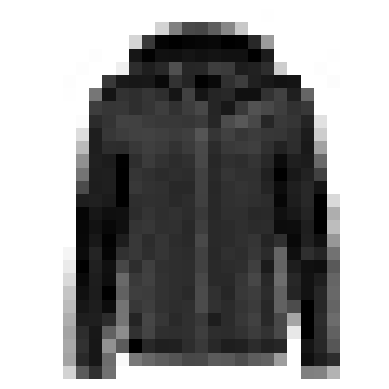

In [92]:
## Para mostrar una imagen
import matplotlib.pyplot as plt
plt.imshow (X_train [0], cmap = "binary")
plt.axis ("off")
plt.show ()

In [25]:
len (class_names)

10

In [93]:
## Creamos el modelo
model = Sequential ([
    Input (shape = (28, 28)),
    keras.layers.Flatten (),
    Dense (300, activation = "relu"),
    Dense (100, activation = "relu"),
    Dense (10, activation = "softmax")
])

In [94]:
model.summary ()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [98]:
## Para obtener los parámetros

weights, biases = hidden1.get_weights ()
weights #Comienza con valores aleatorios

array([[-0.00400517,  0.03660198,  0.00061142, ...,  0.01306136,
         0.01830729,  0.04949097],
       [-0.04564652, -0.05458775,  0.06102172, ..., -0.0414929 ,
         0.02183702,  0.02627398],
       [-0.00712612,  0.0674132 ,  0.01170163, ...,  0.00228003,
        -0.04621043,  0.04941536],
       ...,
       [-0.01888838,  0.04870504, -0.00564028, ...,  0.05453655,
         0.0481731 ,  0.05446009],
       [-0.01528636, -0.00498711, -0.06348092, ..., -0.00515985,
        -0.00408345,  0.03557018],
       [ 0.06016394, -0.07289151, -0.01966617, ..., -0.03334828,
         0.01846108, -0.05299952]], dtype=float32)

In [99]:
biases #Inicializado con 0s

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [100]:
## Compilación del modelo: loss function y el algoritmo de optimización

model.compile (loss = "sparse_categorical_crossentropy",
               optimizer = "sgd", #Backpropagation algorithm
               metrics = ["accuracy"])

In [101]:
## Entrenamiento del modelo

model.fit (X_train, y_train, epochs = 30)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7638 - loss: 0.7142
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8301 - loss: 0.4866
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8445 - loss: 0.4418
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8547 - loss: 0.4149
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8610 - loss: 0.3949
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8660 - loss: 0.3789
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8709 - loss: 0.3656
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8745 - loss: 0.3538
Epoch 9/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8778 - loss: 0.3434
Epoch 10/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8813 - loss: 0.3339
Epoch 11/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8839 - loss: 0.3252
Epoch 12/30
1719/1719 ━━━━━━━━

In [102]:
import pandas as pd
import pandas as pd
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.769964,0.706776,0.8260,0.506437
1,0.830636,0.485918,0.8448,0.446847
2,0.845927,0.443336,0.8324,0.476554
3,0.854745,0.415619,0.8526,0.423826
4,0.859855,0.397147,0.8634,0.392331
5,0.866600,0.380775,0.8674,0.388204
6,0.870200,0.368104,0.8730,0.365019
7,0.873727,0.355713,0.8644,0.376098
8,0.876891,0.346265,0.8732,0.353411
9,0.880145,0.336402,0.8804,0.346826


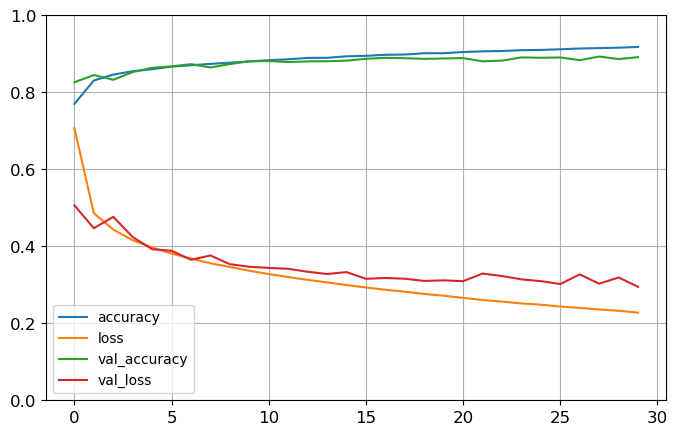

In [103]:
pd.DataFrame (history.history).plot (figsize = (8, 5))
plt.grid (True)
plt.gca().set_ylim (0,1)
plt.show ()

In [104]:
model.evaluate (X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8723 - loss: 0.3532  


[0.35315683484077454, 0.8723000288009644]

In [105]:
## Predicción con el modelo entrenado

X_new = X_test [:3]
y_proba = model.predict (X_new)
y_proba.round (2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [108]:
y_pred = np.argmax(model.predict (X_new), axis = -1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([9, 2, 1], dtype=int64)

In [109]:
np.array (class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [110]:
y_new = y_test [:3]
y_new

array([9, 2, 1], dtype=uint8)

# MLP regresor using Sequential API

In [1]:
## Housing California
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing ()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split (X_train_full, y_train_full)

#Escalamos los datos
scaler = StandardScaler ()
X_train = scaler.fit_transform (X_train)
X_valid = scaler.transform (X_valid)
X_test = scaler.transform (X_test)


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input

In [8]:
model = keras.models.Sequential ([
    Dense (30, activation = "relu", input_shape = X_train.shape [1:]),
    Dense (1)
])
model.compile (loss = "mean_squared_error", optimizer = keras.optimizers.SGD (learning_rate= 1e-3))
history = model.fit (X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.8515 - val_loss: 0.9867
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8104 - val_loss: 0.7647
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7136 - val_loss: 0.7198
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6734 - val_loss: 0.6802
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6418 - val_loss: 0.6572
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6198 - val_loss: 0.6337
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6006 - val_loss: 0.6168
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5852 - val_loss: 0.6004
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5718 - val_loss: 0.5871
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5604 - val_loss: 0.5743
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5507 - val_loss: 0.5633
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [12]:
import pandas as pd
pd.DataFrame (history.history)

,loss,val_loss
0,1.851496,0.986676
1,0.810413,0.764694
2,0.713598,0.719794
3,0.673369,0.680167
4,0.641809,0.657173
5,0.619775,0.633743
6,0.600626,0.616760
7,0.585222,0.600449
8,0.571800,0.587087
9,0.560368,0.574302


In [14]:
mse = model.evaluate (X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict (X_new)
y_pred

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 0.4913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[1.3411653],
       [1.8226794],
       [1.5945482]], dtype=float32)

# Functional API

In [20]:
## California housing

input_ = keras.layers.Input (shape = X_test.shape [1:])
hidden1 = Dense (100, activation = "relu")(input_)
hidden2 = Dense (30, activation = "relu")(hidden1)
concat = keras.layers.concatenate ([input_, hidden2])
output = Dense (1)(concat)
model = keras.Model (inputs = [input_], outputs = [output])

In [21]:
model.compile (loss = "mean_squared_error", optimizer = keras.optimizers.SGD (learning_rate= 1e-3), metrics = ["accuracy"])
history = model.fit (X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0024 - loss: 2.0252 - val_accuracy: 0.0036 - val_loss: 0.8739
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0026 - loss: 0.7801 - val_accuracy: 0.0036 - val_loss: 0.6928
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0026 - loss: 0.6487 - val_accuracy: 0.0036 - val_loss: 0.6373
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0026 - loss: 0.6101 - val_accuracy: 0.0036 - val_loss: 0.6068
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0026 - loss: 0.5839 - val_accuracy: 0.0036 - val_loss: 0.5842
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0026 - loss: 0.5632 - val_accuracy: 0.0036 - val_loss: 0.5646
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0026 - loss: 0.5461 - val_accuracy: 0.0036 - val_loss: 0.5451
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0025 - loss: 0.5320 - val_accuracy: 0.

In [22]:
pd.DataFrame (history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.002412,2.025192,0.003618,0.873880
1,0.002584,0.780098,0.003618,0.692783
2,0.002584,0.648655,0.003618,0.637337
3,0.002584,0.610116,0.003618,0.606773
4,0.002584,0.583869,0.003618,0.584230
5,0.002584,0.563232,0.003618,0.564615
6,0.002584,0.546082,0.003618,0.545077
7,0.002498,0.532030,0.003618,0.533150
8,0.002498,0.521705,0.003618,0.520693
9,0.002498,0.510961,0.003618,0.512814


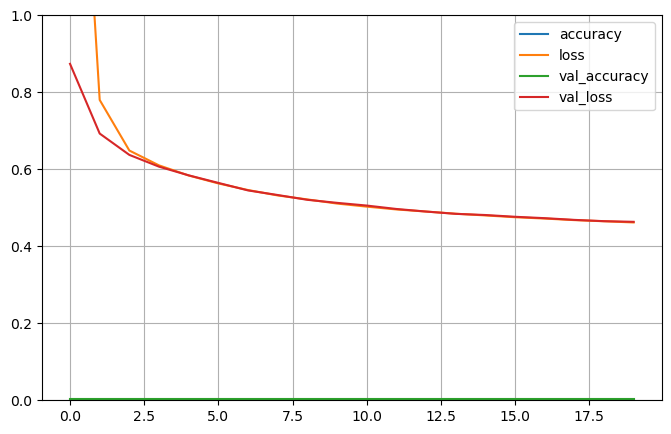

In [24]:
import matplotlib.pyplot as plt
pd.DataFrame (history.history).plot (figsize = (8, 5))
plt.grid (True)
plt.gca().set_ylim (0,1)
plt.show ()

In [25]:
model.evaluate (X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.0035 - loss: 0.4545


[0.45452454686164856, 0.003488372080028057]

### Multiple Input and Output functional API

In [26]:
## Multiple Inputs

input_A = keras.layers.Input (shape = [5], name = "wide input")
input_B = keras.layers.Input (shape = [6], name = "deep_input")
hidden1 = Dense (100, activation = "relu")(input_B) # Input_B por Deep
#Hidden layers...
concat = keras.layers.concatenate ([input_A, hidden2]) #Input_A por wide
#output y model...



In [31]:
## Multiple Outputs

output = Dense (1, name = "main output") (concat)
aux_output = Dense (1, name = "auxiliary output") (hidden2)
model = keras.Model (inputs = [input_A, input_B], outputs = [output, aux_output])
model.compile (loss = ["mse", "mse"], loss_weights = [0.9, 0.1], optimizer = keras.optimizers.SGD (learning_rate= 1e-3)) #Función de pérdida y peso de cada output.


# Saving and restoring models. Callbacks

In [ ]:
# Para guardar un modelo
model.save ("my_keras_model.h5")
# Para cargar el modelo
model = keras.models_load.model ("my_keras_model.h5")


In [ ]:
## Callbacks. Sirve para indicar guardar checkpoints al modelo.
## Ex. Early stopping
early_stopping = keras.callbacks.EarlyStopping (patience = 10) # O sirve también
checkpoint_cb = keras.callbacks.ModelCheckpoint ("my_keras_model.h5", save_best_only=True)
model.fit (X_train, y_train, callbacks = [early_stopping]) #O checkpoint_cb


# TensorBoard: training process visualization

In [32]:
import os
root_logdir = os.path.join (os.curdir, "my_logs") #Crea un directorio en el dir actual

def get_run_logdir ():
    import time
    run_id = time.strftime ("run_%Y_%m_%d_%H_%M_%S")
    return os.path.join (root_logdir, run_id)
run_logdir = get_run_logdir ()

In [34]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
339/363 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 3.1969

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0936 - val_loss: 0.9524
Epoch 2/30
345/363 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.8446

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8239 - val_loss: 0.7760
Epoch 3/30
354/363 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.7312

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7326 - val_loss: 0.7264
Epoch 4/30
360/363 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.7007

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6912 - val_loss: 0.6886
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.6489

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6553 - val_loss: 0.6585
Epoch 6/30
304/363 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.6333

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6284 - val_loss: 0.6318
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.6080

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6009 - val_loss: 0.6066
Epoch 8/30
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.6024

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5787 - val_loss: 0.5861
Epoch 9/30
306/363 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.5469

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5585 - val_loss: 0.5649
Epoch 10/30
308/363 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 0.5501

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5409 - val_loss: 0.5483
Epoch 11/30
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.5091

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5260 - val_loss: 0.5334
Epoch 12/30
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.5104

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5127 - val_loss: 0.5229
Epoch 13/30
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 0.4922

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5025 - val_loss: 0.5114
Epoch 14/30
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.4883

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4925 - val_loss: 0.5024
Epoch 15/30
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.4875

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4853 - val_loss: 0.4953
Epoch 16/30
302/363 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.4855

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4778 - val_loss: 0.4873
Epoch 17/30
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.4801

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4723 - val_loss: 0.4826
Epoch 18/30
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.4493

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4672 - val_loss: 0.4789
Epoch 19/30
304/363 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.4666

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4631 - val_loss: 0.4733
Epoch 20/30
307/363 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.4709

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4588 - val_loss: 0.4688
Epoch 21/30
309/363 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.4718

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4550 - val_loss: 0.4656
Epoch 22/30
357/363 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.4753

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4519 - val_loss: 0.4632
Epoch 23/30
332/363 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.4413

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4489 - val_loss: 0.4592
Epoch 24/30
308/363 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.4362

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4458 - val_loss: 0.4577
Epoch 25/30
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.4435

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4430 - val_loss: 0.4547
Epoch 26/30
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.4362

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4406 - val_loss: 0.4520
Epoch 27/30
310/363 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.4298

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4384 - val_loss: 0.4500
Epoch 28/30
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 0.4390

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4359 - val_loss: 0.4481
Epoch 29/30
307/363 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 0.4288

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4338 - val_loss: 0.4464
Epoch 30/30
302/363 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.4321

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4319 - val_loss: 0.4449


In [37]:
import numpy as np
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " +
str(step**2)]
tf.summary.text("my_text", texts, step=step)
sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi *
step)
audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

<tf.Tensor: shape=(), dtype=bool, numpy=False>

# Fine tuning hyperparameters

In [39]:
def build_model (n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape = [8]):
    """
    Builds a model with the hyperparameters given.
    """
    model = keras.models.sequential
    model.add (keras.layers.InputLayer (input_shape = input_shape))
    for layer in range (n_hidden):
        model.add (keras.layers.Dense(n_neurons, activation = "relu"))
    model.add (keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD (lr = learning_rate)
    model.compile (loss = "mse", optimizer = optimizer)
    return model

In [45]:
keras_reg = tf.keras.wrappers.SKLearnRegressor(build_model)
